<a href="https://colab.research.google.com/github/src263/pratice/blob/master/Copy_of_Healthcare_5april_beofre_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
data =pd.read_csv("/content/drive/MyDrive/drive/Mediclaim_insuarance.csv")
data.head()

,Age,Smoke,BMI,ACC-H,Income,Med_H,Class
0,6,vhigh,2,2,low,low,bad
1,6,vhigh,2,2,low,med,bad
2,6,vhigh,2,2,low,high,bad
3,6,vhigh,2,2,avg,low,bad
4,6,vhigh,2,2,avg,med,bad


In [8]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

!pip install scikit-plot

from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [9]:
data.shape

(1728, 7)

In [10]:
target = 'Class'
labels = ['bad','ok', 'good', 'vgood']
features = [i for i in data.columns.values if i not in [target]]

print(features)
print(labels)

original_data = data.copy(deep=True)
display(data.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(data.shape[1], data.shape[0]))

['Age', 'Smoke', 'BMI', 'ACC-H', 'Income', 'Med_H']
['bad', 'ok', 'good', 'vgood']


,Age,Smoke,BMI,ACC-H,Income,Med_H,Class
0,6,vhigh,2,2,low,low,bad
1,6,vhigh,2,2,low,med,bad
2,6,vhigh,2,2,low,high,bad
3,6,vhigh,2,2,avg,low,bad
4,6,vhigh,2,2,avg,med,bad



Inference: The Datset consists of 7 features & 1728 samples.


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     1728 non-null   int64 
 1   Smoke   1728 non-null   object
 2   BMI     1728 non-null   object
 3   ACC-H   1728 non-null   object
 4   Income  1728 non-null   object
 5   Med_H   1728 non-null   object
 6   Class   1728 non-null   object
dtypes: int64(1), object(6)
memory usage: 94.6+ KB


In [12]:
data.nunique().sort_values()


ACC-H     3
Income    3
Med_H     3
Smoke     4
BMI       4
Class     4
Age       6
dtype: int64

In [13]:
nu = data[features].nunique().sort_values()
print(nu)
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(data[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


ACC-H     3
Income    3
Med_H     3
Smoke     4
BMI       4
Age       6
dtype: int64

Inference: The Datset has 0 numerical & 6 categorical features.


In [14]:
data.describe()

,Age
count,1728.000000
mean,3.485532
std,1.670209
min,1.000000
25%,2.000000
50%,3.500000
75%,4.250000
max,6.000000


In [15]:
data.isnull().sum()

Age       0
Smoke     0
BMI       0
ACC-H     0
Income    0
Med_H     0
Class     0
dtype: int64

In [16]:
#Checking number of unique rows in each feature

nu = data[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(data[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))




Inference: The Datset has 0 numerical & 6 categorical features.


In [17]:
display(data.describe())


,Age
count,1728.000000
mean,3.485532
std,1.670209
min,1.000000
25%,2.000000
50%,3.500000
75%,4.250000
max,6.000000


In [18]:
#2. Exploratory Data Analysis (EDA)



            Target Variable Distribution           


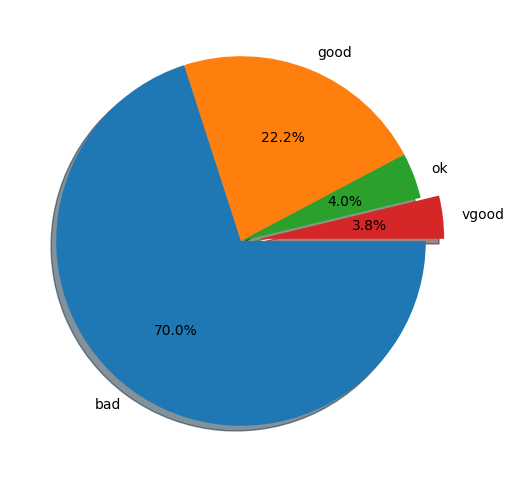

In [19]:
#Let us first analyze the distribution of the target variable

MAP={}
for e, i in enumerate(sorted(data[target].unique())):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = data.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True,
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

In [20]:
for e, i in enumerate(sorted(data[target].unique())):
  MAP[i]=labels[e]
MAP
df1 = data.copy()
df1[target]=df1[target].map(MAP)

In [21]:
df1[target]
data[target]
explode=np.zeros(len(labels))
explode


array([0., 0., 0., 0.])

In [22]:
explode[-1]=0.1
explode

array([0. , 0. , 0. , 0.1])

In [23]:
print('\033[1mTarget Variable Distribution'.center(55))


            Target Variable Distribution           


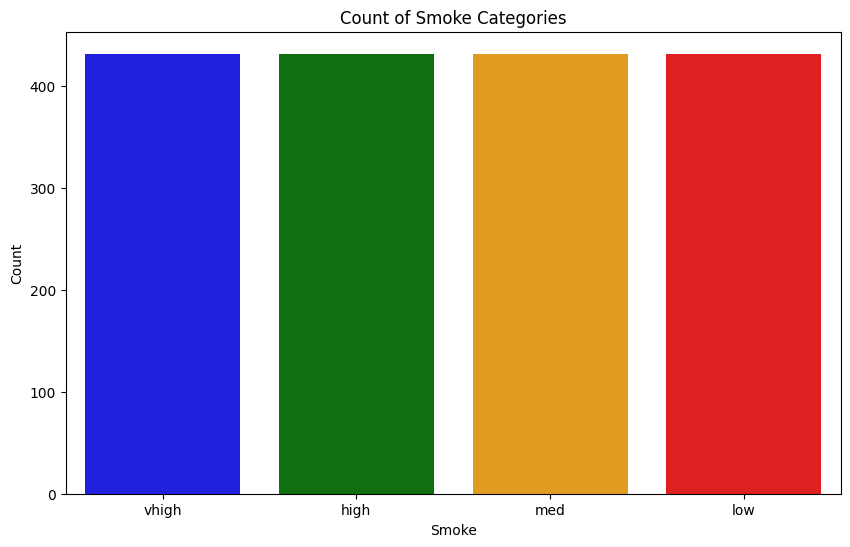

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the counts of each category of 'Smoke'
smoke_counts = data['Smoke'].value_counts()

# Define custom colors
custom_colors = ['blue', 'green', 'orange', 'red']

# Plot the bar graph with custom colors
sns.barplot(x=smoke_counts.index, y=smoke_counts.values, palette=custom_colors)

# Set labels and title
plt.xlabel('Smoke')
plt.ylabel('Count')
plt.title('Count of Smoke Categories')

# Display the plot
plt.show()

In [25]:
#Age	Smoke	BMI	ACC-H	Income	Med_H	Class
# BMI       4
# Class     4
# Age       6

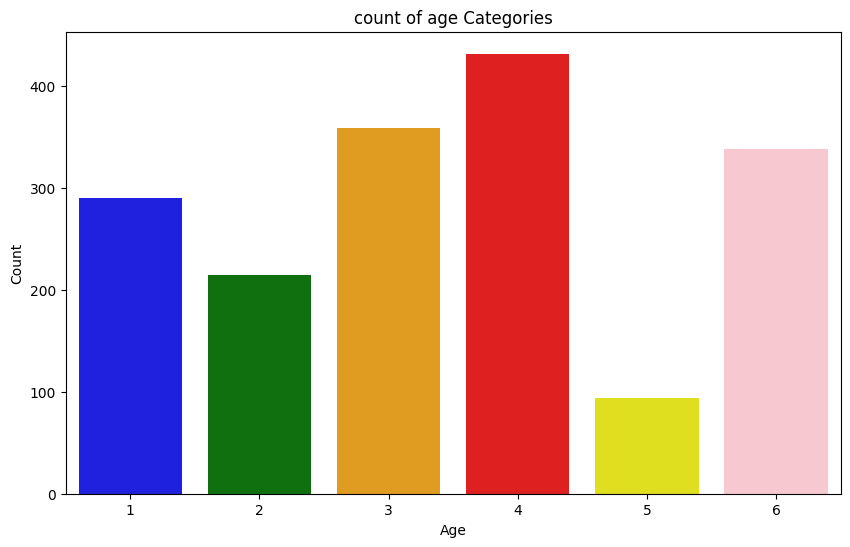

In [26]:
age_counts = data['Age'].value_counts()

# Define custom colors
custom_colors = ['blue', 'green', 'orange', 'red','yellow','pink']

# Plot the bar graph with custom colors
sns.barplot(x=age_counts.index, y=age_counts.values, palette=custom_colors)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('count of age Categories')

# Display the plot
plt.show()

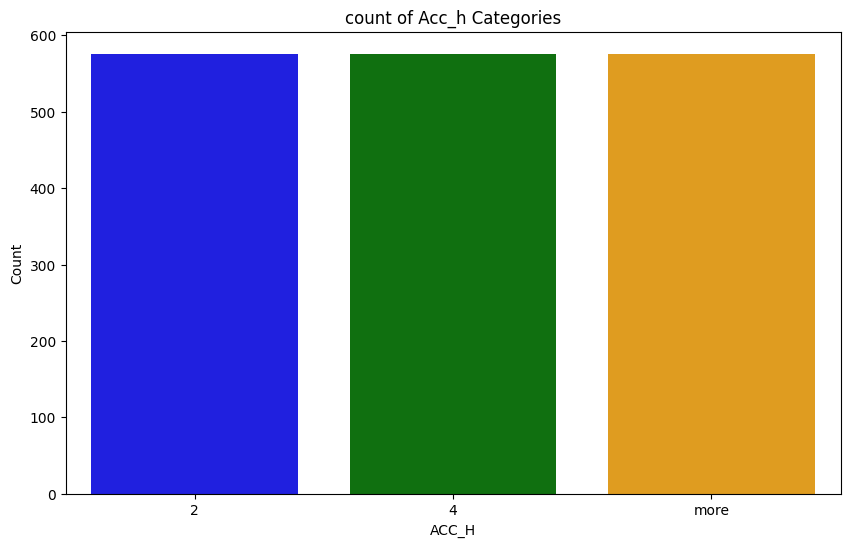

In [27]:
acc_h_counts = data['ACC-H'].value_counts()

# Define custom colors
custom_colors = ['blue', 'green', 'orange']

# Plot the bar graph with custom colors
sns.barplot(x=acc_h_counts.index, y=acc_h_counts.values, palette=custom_colors)

# Set labels and title
plt.xlabel('ACC_H')
plt.ylabel('Count')
plt.title('count of Acc_h Categories')

# Display the plot
plt.show()

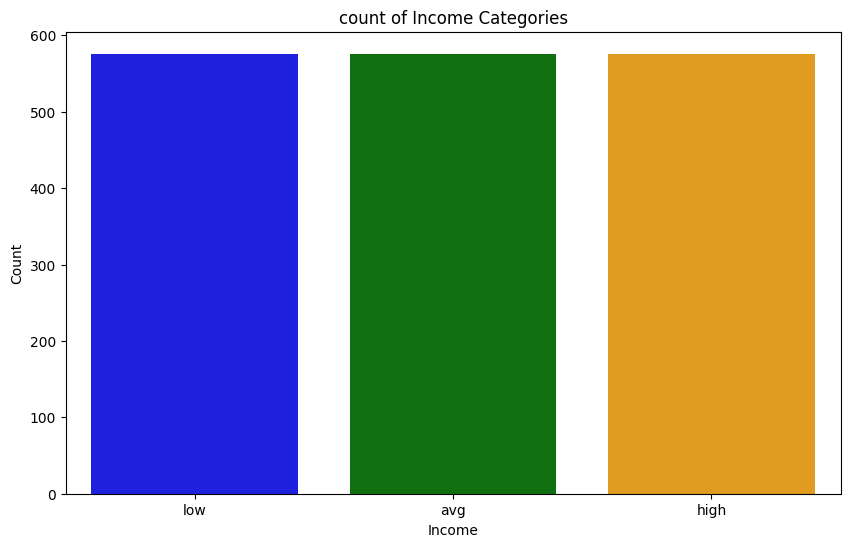

In [28]:
income_counts = data['Income'].value_counts()

# Define custom colors
custom_colors = ['blue', 'green', 'orange']

# Plot the bar graph with custom colors
sns.barplot(x=income_counts.index, y=income_counts.values, palette=custom_colors)

# Set labels and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('count of Income Categories')

# Display the plot
plt.show()

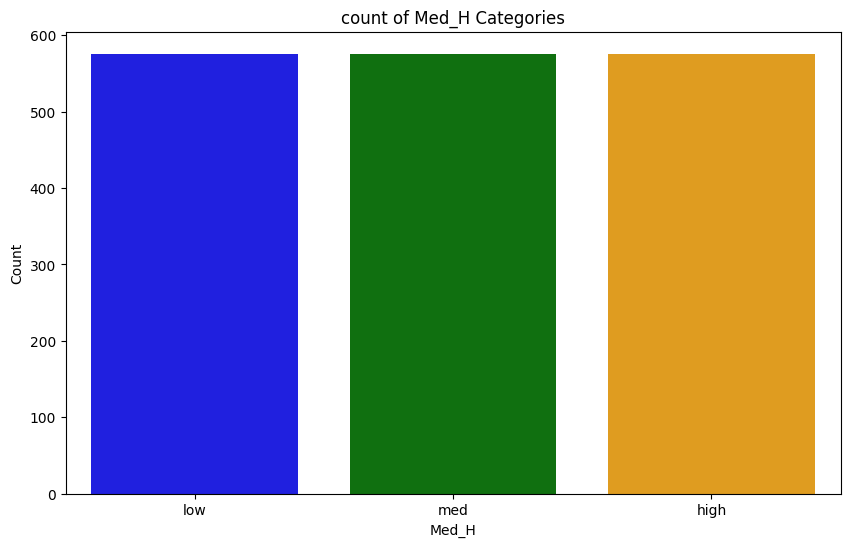

In [29]:
med_H_counts = data['Med_H'].value_counts()

# Define custom colors
custom_colors = ['blue', 'green', 'orange']

# Plot the bar graph with custom colors
sns.barplot(x=med_H_counts.index, y=med_H_counts.values, palette=custom_colors)

# Set labels and title
plt.xlabel('Med_H')
plt.ylabel('Count')
plt.title('count of Med_H Categories')

# Display the plot
plt.show()

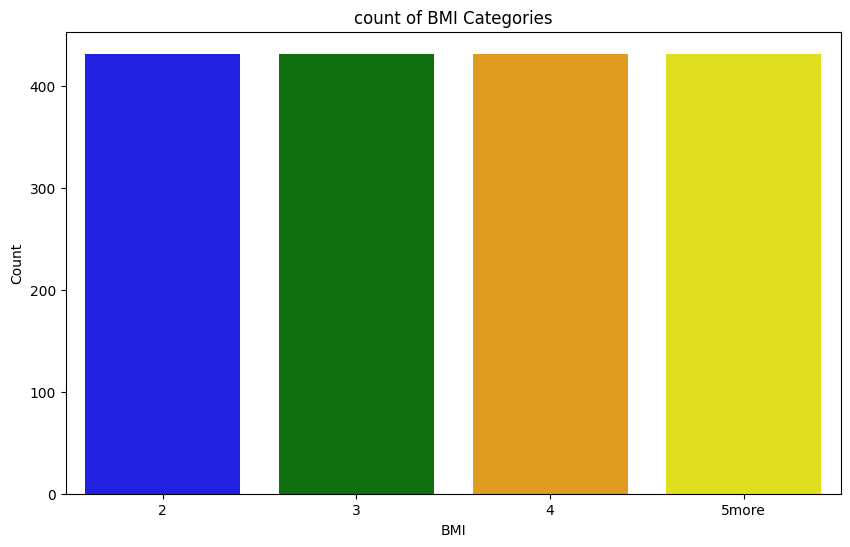

In [30]:
bmi_counts = data['BMI'].value_counts()

# Define custom colors
custom_colors = ['blue', 'green', 'orange', 'yellow']

# Plot the bar graph with custom colors
sns.barplot(x=bmi_counts.index, y=bmi_counts.values, palette=custom_colors)

# Set labels and title
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('count of BMI Categories')

# Display the plot
plt.show()

In [31]:
#Removal of any Duplicate rows (if any)

counter = 0
original_df = df1.copy()
rows, columns = original_df.shape
df2 = original_df.copy()
df2.drop_duplicates(inplace=True)
df2.reset_index(drop=True,inplace=True)

if df2.shape==(rows,columns):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df2.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [32]:
#Check for empty elements

nvc = pd.DataFrame(df2.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df2.shape[0],3)*100
print(nvc)

        Total Null Values  Percentage
Age                     0         0.0
Smoke                   0         0.0
BMI                     0         0.0
ACC-H                   0         0.0
Income                  0         0.0
Med_H                   0         0.0
Class                   0         0.0


In [33]:
#Converting categorical Columns to Numeric

#df1 = df.copy()
ecc = nvc[nvc['Percentage']!=0].index.values
print(nvc)
print(ecc)
dcc = [i for i in data.columns if i not in ecc] #Taking that column which are non null, its checking basically which are null and adding check if thats avaibalbe in null array then  dont take them

print(dcc)

df3 = df2[dcc]
fcc = [i for i in cf if i not in ecc]

print(fcc)

#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1m\nOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)

df3.shape

        Total Null Values  Percentage
Age                     0         0.0
Smoke                   0         0.0
BMI                     0         0.0
ACC-H                   0         0.0
Income                  0         0.0
Med_H                   0         0.0
Class                   0         0.0
[]
['Age', 'Smoke', 'BMI', 'ACC-H', 'Income', 'Med_H', 'Class']
['ACC-H', 'Income', 'Med_H', 'Smoke', 'BMI', 'Age']

Dummy Encoding on features:
ACC-H
Income
Med_H
Smoke
BMI
Age


(1728, 18)

In [34]:
df3

,Class,ACC-H_4,ACC-H_more,Income_high,Income_low,Med_H_low,Med_H_med,Smoke_low,Smoke_med,Smoke_vhigh,BMI_3,BMI_4,BMI_5more,Age_2,Age_3,Age_4,Age_5,Age_6
0,bad,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,True
1,bad,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True
2,bad,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True
3,bad,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True
4,bad,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,ok,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False
1724,vgood,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
1725,bad,False,True,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False
1726,ok,False,True,True,False,False,True,True,False,False,False,False,True,False,False,False,False,False


In [35]:
#Fixing the imbalance using SMOTE Technique

df5 = df3.copy()

#Splitting the data intro training & testing sets
from sklearn.preprocessing import LabelEncoder

df = df5.copy()

X = df.drop([target],axis=1)

for col in X:
    X[col] = X[col].astype(int)


Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, stratify=Y, random_state=42)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

y = ['bad', 'good', 'ok', 'vgood']

# smote = SMOTE(random_state=42)
smote = SMOTE(sampling_strategy={'ok': 1210, 'vgood': 1210}, random_state=42)


print("saurabh")

print(Train_X.shape)
print(Train_Y.shape)
Train_X, Train_Y = smote.fit_resample(Train_X, Train_Y)
print(Train_X.shape)
print(Train_Y.shape)

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Fit label encoder and transform target variable
# y_encoded = label_encoder.fit_transform(y)



# label_encoder = LabelEncoder()
# Test_Y = label_encoder.fit_transform(Test_Y)
# Train_Y = label_encoder.fit_transform(Train_Y)



# print('Original class distribution:')
print(df5[target].value_counts())

# xf = df5.columns
# X = df5.drop([target],axis=1)
# Y = df5[target]



# df5 = pd.DataFrame(X, columns=xf)
# df5[target] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Train_Y.value_counts())




Original set  --->  (1728, 17) (1728,) 
Training set  --->  (1382, 17) (1382,) 
Testing set   --->  (346, 17)  (346,)
saurabh
(1382, 17)
(1382,)
(3695, 17)
(3695,)
Class
bad      1210
good      384
ok         69
vgood      65
Name: count, dtype: int64

Class distribution after applying SMOTE Technique:
Class
ok       1210
vgood    1210
bad       968
good      307
Name: count, dtype: int64



Inference:The final dataset after cleanup has 1728 samples & 18 columns.


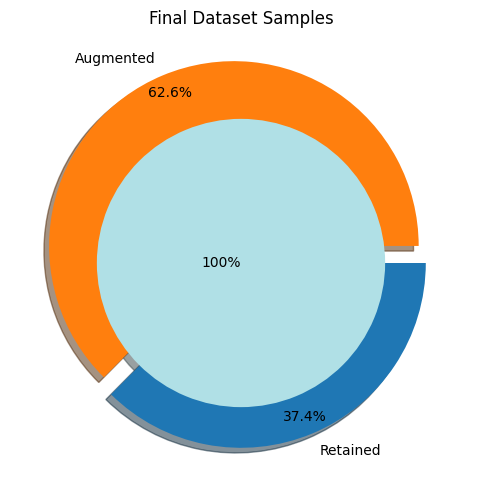

In [36]:
#Final Dataset size after performing Preprocessing

df = df5.copy()
plt.title('Final Dataset Samples')
plt.pie([0.8*df.shape[0], Train_X.shape[0] - 0.8*df.shape[0]], radius = 1, shadow=True,
        labels=['Retained','Augmented'], counterclock=False, autopct='%1.1f%%', pctdistance=0.9, explode=[0,0.1])
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])



# plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} columns.'.format(df.shape[0], df.shape[1]))



In [37]:
# #Splitting the data intro training & testing sets
# from sklearn.preprocessing import LabelEncoder


# df = df5.copy()

# X = df.drop([target],axis=1)
# Y = df[target]
# Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

# print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

# y = ['bad', 'good', 'ok', 'vgood']

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Fit label encoder and transform target variable
# y_encoded = label_encoder.fit_transform(y)



# label_encoder = LabelEncoder()
# Test_Y = label_encoder.fit_transform(Test_Y)
# Train_Y = label_encoder.fit_transform(Train_Y)

In [38]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,ACC-H_4,ACC-H_more,Income_high,Income_low,Med_H_low,Med_H_med,Smoke_low,Smoke_med,Smoke_vhigh,BMI_3,BMI_4,BMI_5more,Age_2,Age_3,Age_4,Age_5,Age_6
count,3.695000e+03,3.695000e+03,3.695000e+03,3.695000e+03,3695.000000,3.695000e+03,3.695000e+03,3.695000e+03,3.695000e+03,3.695000e+03,3695.000000,3.695000e+03,3.695000e+03,3.695000e+03,3695.000000,3.695000e+03,3.695000e+03
mean,-4.615163e-17,8.461131e-17,-3.076775e-17,1.538388e-16,0.000000,4.615163e-17,1.692226e-16,1.922984e-17,-3.076775e-17,-7.691938e-18,0.000000,8.268833e-17,5.865102e-17,3.076775e-17,0.000000,-3.076775e-17,-3.076775e-17
std,1.000135e+00,1.000135e+00,1.000135e+00,1.000135e+00,1.000135,1.000135e+00,1.000135e+00,1.000135e+00,1.000135e+00,1.000135e+00,1.000135,1.000135e+00,1.000135e+00,1.000135e+00,1.000135,1.000135e+00,1.000135e+00
min,-8.248086e-01,-8.543237e-01,-7.747644e-01,-5.080221e-01,-0.379424,-6.037182e-01,-8.486488e-01,-5.678704e-01,-3.214256e-01,-4.753373e-01,-0.484301,-5.265177e-01,-4.101155e-01,-3.738028e-01,-0.320400,-1.487616e-01,-2.818909e-01
25%,-8.248086e-01,-8.543237e-01,-7.747644e-01,-5.080221e-01,-0.379424,-6.037182e-01,-8.486488e-01,-5.678704e-01,-3.214256e-01,-4.753373e-01,-0.484301,-5.265177e-01,-4.101155e-01,-3.738028e-01,-0.320400,-1.487616e-01,-2.818909e-01
50%,-8.248086e-01,-8.543237e-01,-7.747644e-01,-5.080221e-01,-0.379424,-6.037182e-01,-8.486488e-01,-5.678704e-01,-3.214256e-01,-4.753373e-01,-0.484301,-5.265177e-01,-4.101155e-01,-3.738028e-01,-0.320400,-1.487616e-01,-2.818909e-01
75%,1.212402e+00,1.170517e+00,1.290715e+00,-5.080221e-01,-0.379424,1.656402e+00,1.178344e+00,-5.678704e-01,-3.214256e-01,-4.753373e-01,-0.484301,-5.265177e-01,-4.101155e-01,-3.738028e-01,-0.320400,-1.487616e-01,-2.818909e-01
max,1.212402e+00,1.170517e+00,1.290715e+00,1.968418e+00,2.635571,1.656402e+00,1.178344e+00,1.760965e+00,3.111140e+00,2.103769e+00,2.064832,1.899271e+00,2.438337e+00,2.675207e+00,3.121102,6.722165e+00,3.547472e+00



                                Standardardization on Testing set                                


,ACC-H_4,ACC-H_more,Income_high,Income_low,Med_H_low,Med_H_med,Smoke_low,Smoke_med,Smoke_vhigh,BMI_3,BMI_4,BMI_5more,Age_2,Age_3,Age_4,Age_5,Age_6
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,-0.141813,-0.204736,-0.118109,0.322230,0.587814,0.173606,-0.391697,0.064819,0.531755,0.247707,0.134564,0.020337,-0.047885,0.278298,0.554896,0.129253,0.448566
std,0.963122,0.946539,0.963220,1.170774,1.409401,1.075153,0.848241,1.037422,1.485618,1.160131,1.094549,1.015126,0.950367,1.252021,1.500899,1.355816,1.506711
min,-0.824809,-0.854324,-0.774764,-0.508022,-0.379424,-0.603718,-0.848649,-0.567870,-0.321426,-0.475337,-0.484301,-0.526518,-0.410116,-0.373803,-0.320400,-0.148762,-0.281891
25%,-0.824809,-0.854324,-0.774764,-0.508022,-0.379424,-0.603718,-0.848649,-0.567870,-0.321426,-0.475337,-0.484301,-0.526518,-0.410116,-0.373803,-0.320400,-0.148762,-0.281891
50%,-0.824809,-0.854324,-0.774764,-0.508022,-0.379424,-0.603718,-0.848649,-0.567870,-0.321426,-0.475337,-0.484301,-0.526518,-0.410116,-0.373803,-0.320400,-0.148762,-0.281891
75%,1.212402,1.170517,1.290715,1.968418,2.635571,1.656402,-0.848649,1.760965,-0.321426,2.103769,-0.484301,-0.526518,-0.410116,-0.373803,3.121102,-0.148762,-0.281891
max,1.212402,1.170517,1.290715,1.968418,2.635571,1.656402,1.178344,1.760965,3.111140,2.103769,2.064832,1.899271,2.438337,2.675207,3.121102,6.722165,3.547472


  0%|          | 0/17 [00:00<?, ?it/s]

Number of features selected by RFE: 17


  6%|▌         | 1/17 [00:00<00:12,  1.28it/s]

Number of features selected by RFE: 16


 12%|█▏        | 2/17 [00:01<00:14,  1.05it/s]

Number of features selected by RFE: 15


 18%|█▊        | 3/17 [00:02<00:13,  1.01it/s]

Number of features selected by RFE: 14


 24%|██▎       | 4/17 [00:04<00:13,  1.08s/it]

Number of features selected by RFE: 13


 29%|██▉       | 5/17 [00:05<00:12,  1.07s/it]

Number of features selected by RFE: 12


 35%|███▌      | 6/17 [00:10<00:27,  2.48s/it]

Number of features selected by RFE: 11


 41%|████      | 7/17 [00:12<00:24,  2.49s/it]

Number of features selected by RFE: 10


 47%|████▋     | 8/17 [00:16<00:25,  2.86s/it]

Number of features selected by RFE: 9


 53%|█████▎    | 9/17 [00:21<00:27,  3.47s/it]

Number of features selected by RFE: 8


 59%|█████▉    | 10/17 [00:26<00:28,  4.12s/it]

Number of features selected by RFE: 7


 65%|██████▍   | 11/17 [00:30<00:23,  3.87s/it]

Number of features selected by RFE: 6


 71%|███████   | 12/17 [00:35<00:21,  4.21s/it]

Number of features selected by RFE: 5


 76%|███████▋  | 13/17 [00:41<00:19,  4.84s/it]

Number of features selected by RFE: 4


 82%|████████▏ | 14/17 [00:44<00:13,  4.38s/it]

Number of features selected by RFE: 3


 88%|████████▊ | 15/17 [00:48<00:08,  4.10s/it]

Number of features selected by RFE: 2


 94%|█████████▍| 16/17 [00:50<00:03,  3.56s/it]

Number of features selected by RFE: 1


100%|██████████| 17/17 [00:52<00:00,  3.10s/it]


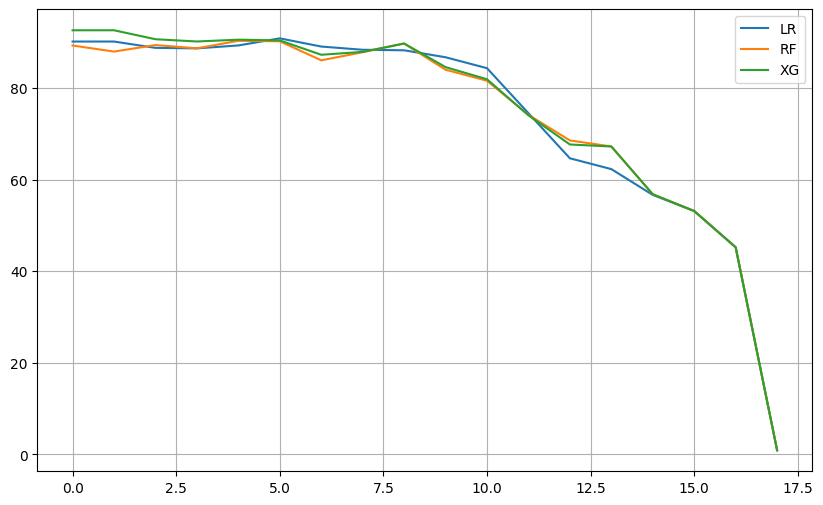

In [39]:
# Applying Recurrsive Feature Elimination

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFE

# Running RFE with the output number of the variable equal to 10
LR = LogisticRegression()#.fit(Train_X_std, Train_Y)
scores1=[]; scores2=[]; scores3=[]

label_encoder = LabelEncoder()

# Fit LabelEncoder on the target variable Train_Y
Train_Y_encoded = label_encoder.fit_transform(Train_Y)
Test_Y_encoded = label_encoder.transform(Test_Y)


scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)
scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std, Train_Y).predict(Test_X_std),average='weighted')*100)


scores3.append(f1_score(Test_Y_encoded,XGBClassifier().fit(Train_X_std, Train_Y_encoded, eval_metric='logloss').predict(Test_X_std),average='weighted')*100)

for i in tqdm(range(len(X.columns.values))):
    rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns)-i)
    rfe = rfe.fit(Train_X_std, Train_Y)
    num_features_selected = sum(rfe.support_)
    print("Number of features selected by RFE:", num_features_selected)
    scores1.append(f1_score(Test_Y,LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    scores2.append(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
    scores3.append(f1_score(Test_Y_encoded,XGBClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y_encoded, eval_metric='logloss').predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)

plt.plot(scores1, label='LR')
plt.plot(scores2, label='RF')
plt.plot(scores3, label='XG')
#plt.ylim([0.80,0.84])
plt.legend()
plt.grid()
plt.show()

In [40]:
#### Finalising the shortlisted features

rfe = RFE(LR,n_features_to_select=len(Train_X_std.columns))
rfe = rfe.fit(Train_X_std, Train_Y)

print(f1_score(Test_Y,LogisticRegression().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
print(f1_score(Test_Y,RandomForestClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y).predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)
print(f1_score(Test_Y_encoded,XGBClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y_encoded, eval_metric='logloss').predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)


# Train_X_std = Train_X_std[Train_X_std.columns[rfe.support_]]
# Test_X_std = Test_X_std[Test_X_std.columns[rfe.support_]]

print(Train_X_std.shape)
print(Test_X_std.shape)

90.17645455147097
88.11217387435406
92.63717269922641
(3695, 17)
(346, 17)


In [41]:
#Let us create first create a table to store the results of various models

Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0


In [42]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
  print(Evaluation_Results)
  auc_roc(Test_Y, pred_prob, curves=['each_class'])
  plt.show()
  Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100
  Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred, average='weighted'),3)*100 #
  Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #
  Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #
  Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob, multi_class='ovr'),3)*100 #[:, 1]


  print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
  print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
  print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #
  print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
  print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))




#Visualising Function
def AUC_ROC_plot(Test_Y, pred):
  ref = [0 for _ in range(len(Test_Y))]
  ref_auc = roc_auc_score(Test_Y, ref)
  lr_auc = roc_auc_score(Test_Y, pred)

  ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
  lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

  plt.plot(ns_fpr, ns_tpr, linestyle='--')
  plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2)))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()

                                 Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)              0.0        0.0     0.0       0.0   
Decision Tree Classifier (DT)         0.0        0.0     0.0       0.0   
Random Forest Classifier (RF)         0.0        0.0     0.0       0.0   
Naïve Bayes Classifier (NB)           0.0        0.0     0.0       0.0   
Support Vector Machine (SVM)          0.0        0.0     0.0       0.0   
K Nearest Neighbours (KNN)            0.0        0.0     0.0       0.0   
Gradient Boosting (GB)                0.0        0.0     0.0       0.0   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   

                                 AUC-ROC score  
Logistic Regression (LR)                   0.0  
Decision Tree Classifier (DT)              0.0  
Random Forest Classifier (RF)              0.0  
Naïve Bayes Classifier (NB)                0.0  
Support Vector Machine (SVM)               0.0  
K Nearest Neighbours (KNN)             

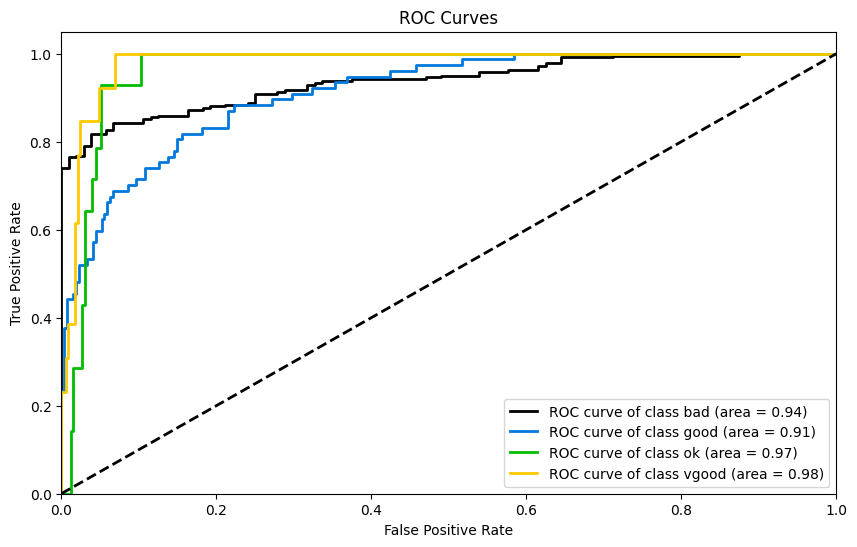

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 78.3%
F1 Score = 79.7%

 Confusiton Matrix:
 [[212   2  14  14]
 [ 20  34   8  15]
 [  0   0  13   1]
 [  0   0   1  12]]

Classification Report:
               precision    recall  f1-score   support

         bad       0.91      0.88      0.89       242
        good       0.94      0.44      0.60        77
          ok       0.36      0.93      0.52        14
       vgood       0.29      0.92      0.44        13

    accuracy                           0.78       346
   macro avg       0.63      0.79      0.61       346
weighted avg       0.87      0.78      0.80       346


Interpreting the Output of Logistic Regression:

intercept  0.134198764332205
classes ['bad' 'good' 'ok' 'vgood']


,coeff
ACC-H_4,-0.620590
ACC-H_more,-0.623930
Income_high,-0.085162
Income_low,0.329144
Med_H_low,0.991504
Med_H_med,0.332915
Smoke_low,-0.184988
Smoke_med,-0.167117
Smoke_vhigh,0.417416
BMI_3,0.048911


In [43]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression()

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l2'] #'none', 'l1', 'l2', 'elasticnet'
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = RCV.fit(Train_X_std, Train_Y).best_estimator_

pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)

Classification_Summary(pred,pred_prob,0)

print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))



['ok' 'bad' 'bad' 'bad' 'vgood' 'vgood' 'bad' 'bad' 'bad' 'bad' 'bad'
 'good' 'bad' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'bad'
 'bad' 'vgood' 'ok' 'bad' 'bad' 'bad' 'bad' 'ok' 'bad' 'good' 'bad'
 'vgood' 'ok' 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad'
 'good' 'bad' 'bad' 'vgood' 'bad' 'bad' 'bad' 'good' 'vgood' 'bad' 'bad'
 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'bad' 'vgood' 'bad'
 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'bad' 'ok' 'good' 'vgood'
 'good' 'good' 'bad' 'ok' 'bad' 'bad' 'bad' 'good' 'good' 'bad' 'bad' 'ok'
 'ok' 'bad' 'bad' 'bad' 'bad' 'bad' 'good' 'bad' 'bad' 'bad' 'bad' 'bad'
 'bad' 'bad' 'good' 'ok' 'bad' 'bad' 'good' 'good' 'bad' 'good' 'bad'
 'good' 'bad' 'bad' 'bad' 'bad' 'ok' 'bad' 'good' 'bad' 'bad' 'bad' 'bad'
 'bad' 'bad' 'good' 'vgood' 'vgood' 'bad' 'bad' 'bad' 'vgood' 'bad'
 'vgood' 'bad' 'ok' 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'ok' 'bad' 'bad'
 'bad' 'good' 'bad' 'good' 'bad' 'bad' 'bad' 'good' 'bad' 'good' 'bad'
 'b

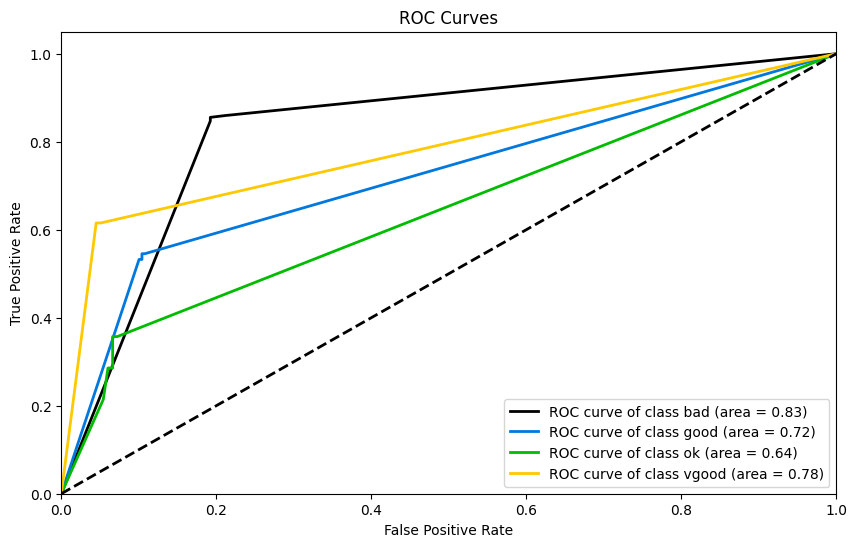

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 75.4%
F1 Score = 76.9%

 Confusiton Matrix:
 [[207  20   8   7]
 [ 17  41  11   8]
 [  3   5   5   1]
 [  0   2   3   8]]

Classification Report:
               precision    recall  f1-score   support

         bad       0.91      0.86      0.88       242
        good       0.60      0.53      0.57        77
          ok       0.19      0.36      0.24        14
       vgood       0.33      0.62      0.43        13

    accuracy                           0.75       346
   macro avg       0.51      0.59      0.53       346
weighted avg       0.79      0.75      0.77       346


Interpreting the output of Decision Tree:



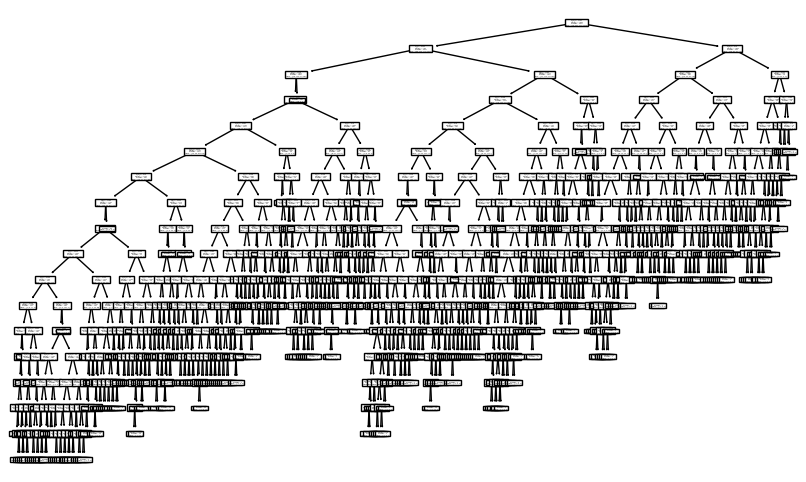

In [44]:
#Building Decision Tree Classifier

DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, len(features)-1),
              "min_samples_leaf": randint(1, len(features)-1),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)


DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)


true_labels = Test_Y

# Assuming a threshold value
threshold = 0.5

# Calling the Classification_Summary method
# Classification_Summary(pred, pred_prob, 0)


print(pred)
print(pred_prob)


# Check shapes of pred and pred_prob
print("Shape of pred:", pred.shape)
print("Shape of pred_prob:", pred_prob.shape)

Classification_Summary(pred,pred_prob,1)

print('\n\033[1mInterpreting the output of Decision Tree:\n\033[0m')
tree.plot_tree(DT)
plt.show()

                                 Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)             78.3       87.5    78.3      79.7   
Decision Tree Classifier (DT)        75.4       79.2    75.4      76.9   
Random Forest Classifier (RF)         0.0        0.0     0.0       0.0   
Naïve Bayes Classifier (NB)           0.0        0.0     0.0       0.0   
Support Vector Machine (SVM)          0.0        0.0     0.0       0.0   
K Nearest Neighbours (KNN)            0.0        0.0     0.0       0.0   
Gradient Boosting (GB)                0.0        0.0     0.0       0.0   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   

                                 AUC-ROC score  
Logistic Regression (LR)                  94.9  
Decision Tree Classifier (DT)             74.4  
Random Forest Classifier (RF)              0.0  
Naïve Bayes Classifier (NB)                0.0  
Support Vector Machine (SVM)               0.0  
K Nearest Neighbours (KNN)             

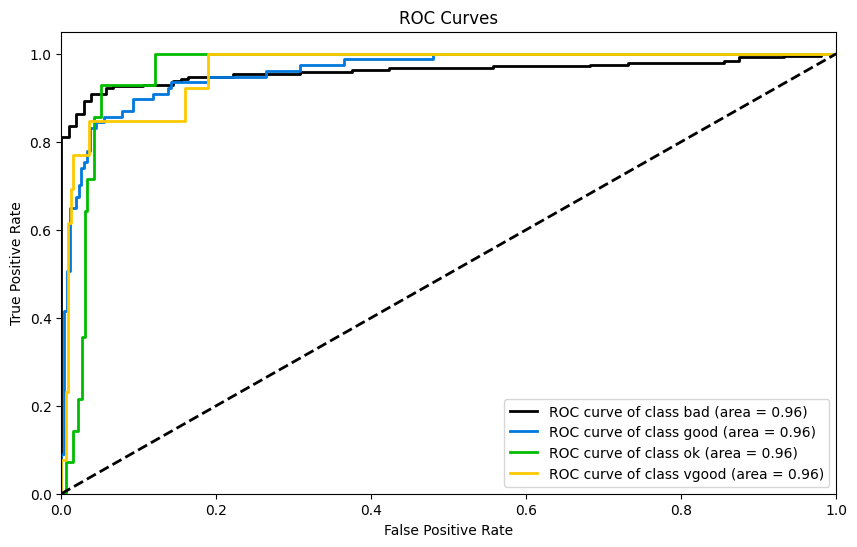

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 88.4%
F1 Score = 89.1%

 Confusiton Matrix:
 [[225   4   6   7]
 [ 10  60   2   5]
 [  0   3  10   1]
 [  0   0   2  11]]

Classification Report:
               precision    recall  f1-score   support

         bad       0.96      0.93      0.94       242
        good       0.90      0.78      0.83        77
          ok       0.50      0.71      0.59        14
       vgood       0.46      0.85      0.59        13

    accuracy                           0.88       346
   macro avg       0.70      0.82      0.74       346
weighted avg       0.91      0.88      0.89       346


Interpreting the output of Random Forest:



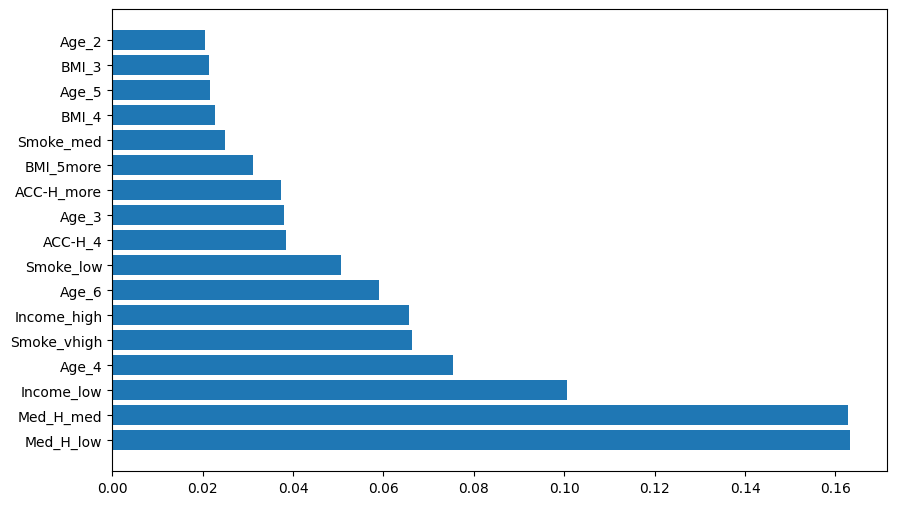

In [45]:
# Building Random-Forest Classifier

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

print('\n\033[1mInterpreting the output of Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

                                 Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)             78.3       87.5    78.3      79.7   
Decision Tree Classifier (DT)        75.4       79.2    75.4      76.9   
Random Forest Classifier (RF)        88.4       90.6    88.4      89.1   
Naïve Bayes Classifier (NB)           0.0        0.0     0.0       0.0   
Support Vector Machine (SVM)          0.0        0.0     0.0       0.0   
K Nearest Neighbours (KNN)            0.0        0.0     0.0       0.0   
Gradient Boosting (GB)                0.0        0.0     0.0       0.0   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   

                                 AUC-ROC score  
Logistic Regression (LR)                  94.9  
Decision Tree Classifier (DT)             74.4  
Random Forest Classifier (RF)             96.2  
Naïve Bayes Classifier (NB)                0.0  
Support Vector Machine (SVM)               0.0  
K Nearest Neighbours (KNN)             

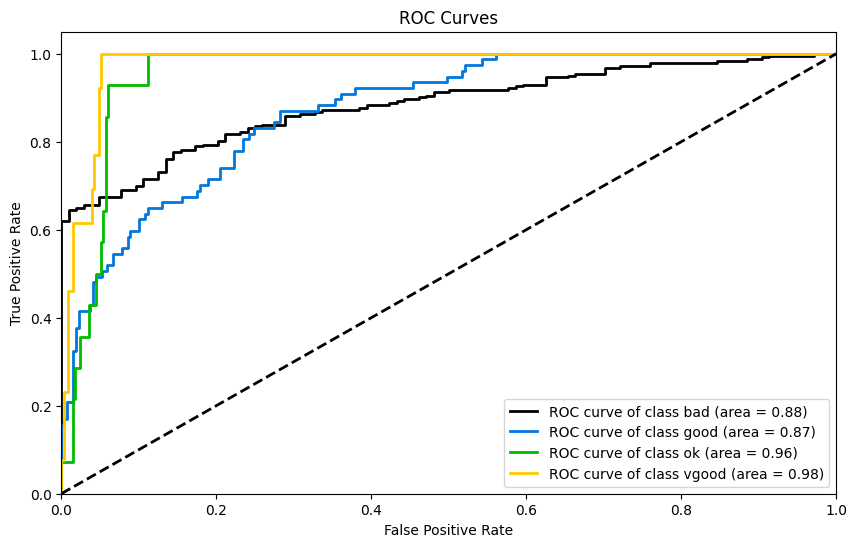

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 77.7%
F1 Score = 77.9%

 Confusiton Matrix:
 [[209  11  12  10]
 [ 30  35   7   5]
 [  0   0  13   1]
 [  0   0   1  12]]

Classification Report:
               precision    recall  f1-score   support

         bad       0.87      0.86      0.87       242
        good       0.76      0.45      0.57        77
          ok       0.39      0.93      0.55        14
       vgood       0.43      0.92      0.59        13

    accuracy                           0.78       346
   macro avg       0.61      0.79      0.64       346
weighted avg       0.81      0.78      0.78       346



In [46]:
# Building Naive Bayes Classifier

NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

                                 Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)             78.3       87.5    78.3      79.7   
Decision Tree Classifier (DT)        75.4       79.2    75.4      76.9   
Random Forest Classifier (RF)        88.4       90.6    88.4      89.1   
Naïve Bayes Classifier (NB)          77.7       81.3    77.7      77.9   
Support Vector Machine (SVM)          0.0        0.0     0.0       0.0   
K Nearest Neighbours (KNN)            0.0        0.0     0.0       0.0   
Gradient Boosting (GB)                0.0        0.0     0.0       0.0   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   

                                 AUC-ROC score  
Logistic Regression (LR)                  94.9  
Decision Tree Classifier (DT)             74.4  
Random Forest Classifier (RF)             96.2  
Naïve Bayes Classifier (NB)               92.3  
Support Vector Machine (SVM)               0.0  
K Nearest Neighbours (KNN)             

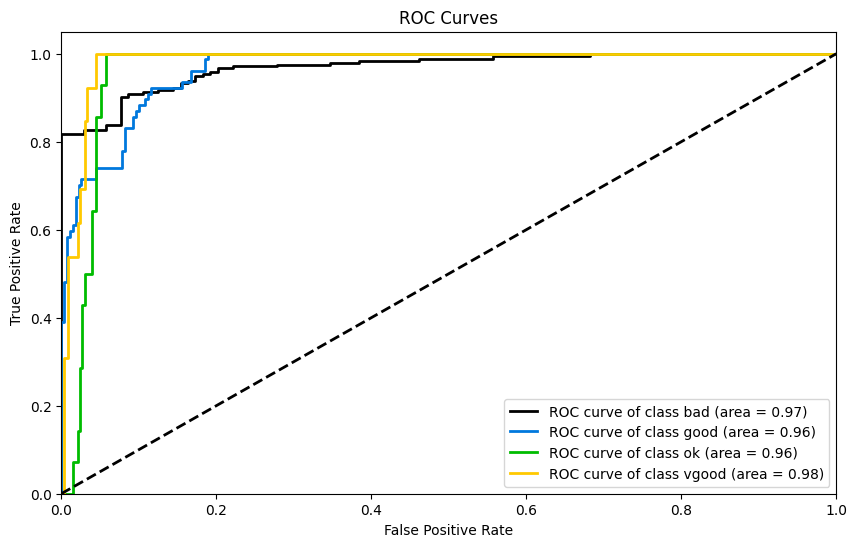

<<<----------------------------------- Evaluating Support Vector Machine (SVM) ----------------------------------->>>

Accuracy = 38.2%
F1 Score = 44.2%

 Confusiton Matrix:
 [[108   0  73  61]
 [  3   0  41  33]
 [  0   0  12   2]
 [  0   0   1  12]]

Classification Report:
               precision    recall  f1-score   support

         bad       0.97      0.45      0.61       242
        good       0.00      0.00      0.00        77
          ok       0.09      0.86      0.17        14
       vgood       0.11      0.92      0.20        13

    accuracy                           0.38       346
   macro avg       0.29      0.56      0.25       346
weighted avg       0.69      0.38      0.44       346



In [47]:
# Building Support Vector Machine Classifier

SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

SVM = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

                                 Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)             78.3       87.5    78.3      79.7   
Decision Tree Classifier (DT)        75.4       79.2    75.4      76.9   
Random Forest Classifier (RF)        88.4       90.6    88.4      89.1   
Naïve Bayes Classifier (NB)          77.7       81.3    77.7      77.9   
Support Vector Machine (SVM)         38.2       68.9    38.2      44.2   
K Nearest Neighbours (KNN)            0.0        0.0     0.0       0.0   
Gradient Boosting (GB)                0.0        0.0     0.0       0.0   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   

                                 AUC-ROC score  
Logistic Regression (LR)                  94.9  
Decision Tree Classifier (DT)             74.4  
Random Forest Classifier (RF)             96.2  
Naïve Bayes Classifier (NB)               92.3  
Support Vector Machine (SVM)              97.1  
K Nearest Neighbours (KNN)             

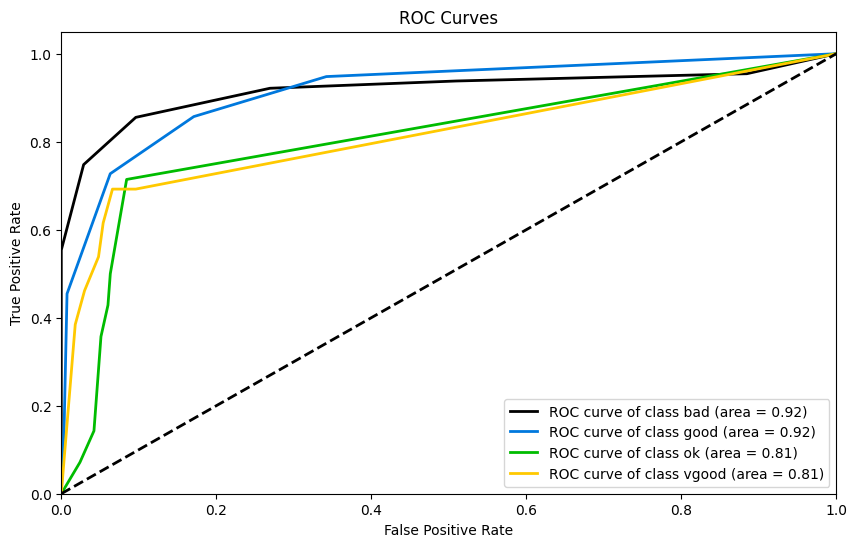

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 79.80000000000001%
F1 Score = 80.30000000000001%

 Confusiton Matrix:
 [[224   3   9   6]
 [ 28  39   6   4]
 [  0   1   6   7]
 [  0   2   4   7]]

Classification Report:
               precision    recall  f1-score   support

         bad       0.89      0.93      0.91       242
        good       0.87      0.51      0.64        77
          ok       0.24      0.43      0.31        14
       vgood       0.29      0.54      0.38        13

    accuracy                           0.80       346
   macro avg       0.57      0.60      0.56       346
weighted avg       0.84      0.80      0.80       346



In [48]:
# Building K-Neareset Neighbours Classifier

KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

In [49]:
#Classification Summary Function
def Classification_Summary1(pred,pred_prob,i):
  print(Evaluation_Results)
  auc_roc(Test_Y_encoded, pred_prob, curves=['each_class'])
  plt.show()
  Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y_encoded, pred),3)*100
  Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y_encoded, pred, average='weighted'),3)*100 #
  Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y_encoded, pred, average='weighted'),3)*100 #
  Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y_encoded, pred, average='weighted'),3)*100 #
  Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y_encoded, pred_prob, multi_class='ovr'),3)*100 #[:, 1]


  print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
  print('Accuracy = {}%'.format(round(accuracy_score(Test_Y_encoded, pred),3)*100))
  print('F1 Score = {}%'.format(round(f1_score(Test_Y_encoded, pred, average='weighted'),3)*100)) #
  print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y_encoded, pred))
  print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y_encoded, pred))

                                 Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)             78.3       87.5    78.3      79.7   
Decision Tree Classifier (DT)        75.4       79.2    75.4      76.9   
Random Forest Classifier (RF)        88.4       90.6    88.4      89.1   
Naïve Bayes Classifier (NB)          77.7       81.3    77.7      77.9   
Support Vector Machine (SVM)         38.2       68.9    38.2      44.2   
K Nearest Neighbours (KNN)           79.8       83.5    79.8      80.3   
Gradient Boosting (GB)               12.7        4.0    12.7       6.0   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   

                                 AUC-ROC score  
Logistic Regression (LR)                  94.9  
Decision Tree Classifier (DT)             74.4  
Random Forest Classifier (RF)             96.2  
Naïve Bayes Classifier (NB)               92.3  
Support Vector Machine (SVM)              97.1  
K Nearest Neighbours (KNN)             

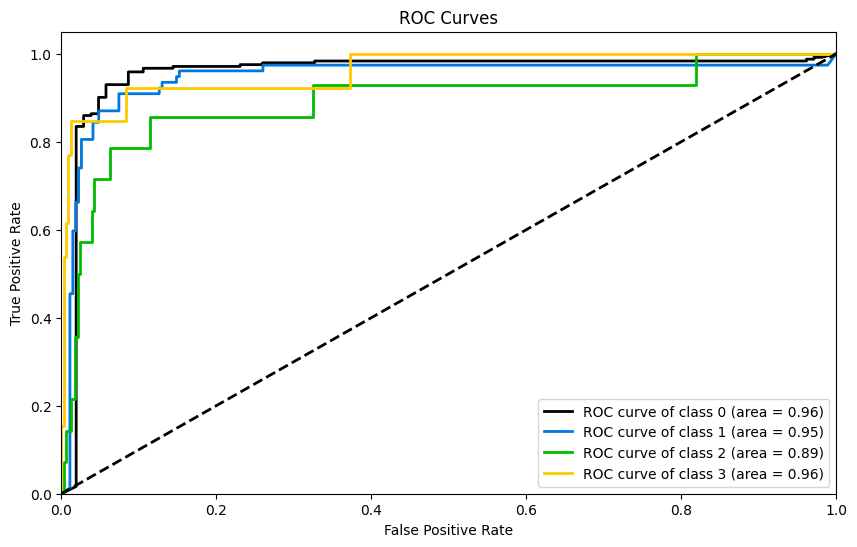

<<<----------------------------------- Evaluating Gradient Boosting (GB) ----------------------------------->>>

Accuracy = 89.60000000000001%
F1 Score = 90.0%

 Confusiton Matrix:
 [[226   8   5   3]
 [  7  65   2   3]
 [  1   4   8   1]
 [  0   0   2  11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       242
           1       0.84      0.84      0.84        77
           2       0.47      0.57      0.52        14
           3       0.61      0.85      0.71        13

    accuracy                           0.90       346
   macro avg       0.72      0.80      0.75       346
weighted avg       0.91      0.90      0.90       346



In [52]:
# Building Gradient Boosting Classifier

# GB_model = GradientBoostingClassifier().fit(Train_X_std, Train_Y_encoded)
# param_dist = {
#     "n_estimators":[5,20,100,500],
#     "max_depth":[1,3,5,7,9],
#     "learning_rate":[0.01,0.1,1,10,100]
# }

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# #RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

# GB = GB_model.fit(Train_X_std, Train_Y_encoded)#.best_estimator_
# pred = GB.predict(Test_X_std)
# pred_prob = GB.predict_proba(Test_X_std)
# Classification_Summary1(pred,pred_prob,6)



################################################################

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold

# Initialize the model
GB_model = GradientBoostingClassifier()

# Define the parameter distribution
param_dist = {
    "n_estimators": [5,10, 20, 50, 100],
    "max_depth": [1, 3, 5, 6, 7, 9],
    "learning_rate": [0.01, 0.1,0.5, 1, 10, 100]
}

# Set up cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Set up RandomizedSearchCV
RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=150, scoring='roc_auc', n_jobs=-1, cv=cv, random_state=1)

# Fit the RandomizedSearchCV object
RCV.fit(Train_X_std, Train_Y_encoded)

# Get the best estimator
GB = RCV.best_estimator_

# Make predictions
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)

# Assuming Classification_Summary1 is a function you have defined
Classification_Summary1(pred, pred_prob, 6)

                                 Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)             78.3       87.5    78.3      79.7   
Decision Tree Classifier (DT)        75.4       79.2    75.4      76.9   
Random Forest Classifier (RF)        88.4       90.6    88.4      89.1   
Naïve Bayes Classifier (NB)          77.7       81.3    77.7      77.9   
Support Vector Machine (SVM)         38.2       68.9    38.2      44.2   
K Nearest Neighbours (KNN)           79.8       83.5    79.8      80.3   
Gradient Boosting (GB)               89.6       90.5    89.6      90.0   
Extreme Gradient Boosting (XGB)       0.0        0.0     0.0       0.0   

                                 AUC-ROC score  
Logistic Regression (LR)                  94.9  
Decision Tree Classifier (DT)             74.4  
Random Forest Classifier (RF)             96.2  
Naïve Bayes Classifier (NB)               92.3  
Support Vector Machine (SVM)              97.1  
K Nearest Neighbours (KNN)             

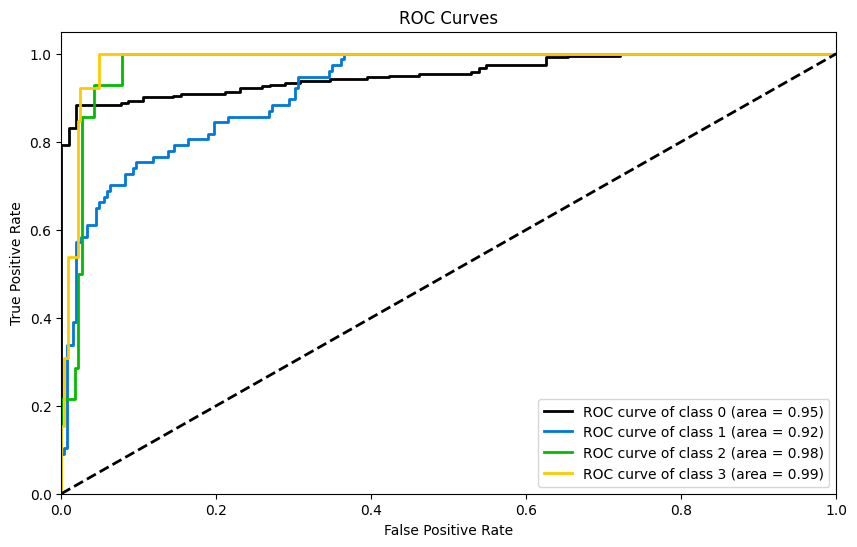

<<<----------------------------------- Evaluating Extreme Gradient Boosting (XGB) ----------------------------------->>>

Accuracy = 82.69999999999999%
F1 Score = 83.8%

 Confusiton Matrix:
 [[218   6   9   9]
 [ 13  42   8  14]
 [  0   0  13   1]
 [  0   0   0  13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       242
           1       0.88      0.55      0.67        77
           2       0.43      0.93      0.59        14
           3       0.35      1.00      0.52        13

    accuracy                           0.83       346
   macro avg       0.65      0.84      0.68       346
weighted avg       0.89      0.83      0.84       346



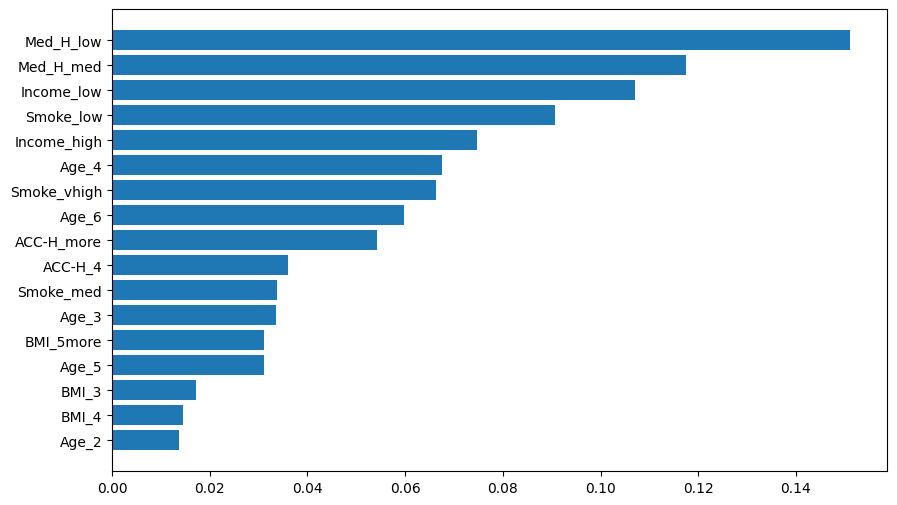

In [53]:
# # Building Gradient Boosting Classifier

# GB_model = XGBClassifier().fit(Train_X_std, Train_Y_encoded)
# param_dist = {
#     "n_estimators":[5,20,100,500],
#     "max_depth":[1,3,5,7,9],
#     "learning_rate":[0.01,0.1,1,10,100]
# }

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# #RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)
#     # scores3.append(f1_score(Test_Y_encoded,XGBClassifier().fit(Train_X_std[Train_X_std.columns[rfe.support_]], Train_Y_encoded, eval_metric='logloss').predict(Test_X_std[Train_X_std.columns[rfe.support_]]),average='weighted')*100)


# GB = GB_model.fit(Train_X_std, Train_Y_encoded)#.best_estimator_
# pred = GB.predict(Test_X_std)
# pred_prob = GB.predict_proba(Test_X_std)

# print(pred)
# print(pred_prob)

# print(Train_X_std)
# print(Train_Y_encoded)
# print(Test_X_std)

# Classification_Summary(pred,pred_prob,6)

#########################################################################


# Building Extreme Gradient Boosting Classifier

# XGB_model = XGBClassifier()#.fit(Train_X_std, Train_Y, eval_metric='logloss')

# param_dist = {
#  "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
#  "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
# }



# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# #RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

# XGB = XGB_model.fit(Train_X_std, Train_Y_encoded, eval_metric='logloss')
# pred = XGB.predict(Test_X_std)
# pred_prob = XGB.predict_proba(Test_X_std)
# Classification_Summary1(pred,pred_prob,7)

# xgbf=pd.DataFrame(XGB.feature_importances_, index=Train_X_std.columns).sort_values(by=0)
# plt.barh(xgbf.index,xgbf.values[:,0])
# plt.show()

###############################################################



import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from xgboost import XGBClassifier

# Initialize the model
XGB_model = XGBClassifier()

# Define the parameter distribution
param_dist = {
    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.5,1,1.5],
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 6,7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4,0.5],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}

# Set up cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Set up RandomizedSearchCV
RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=200, scoring='roc_auc', n_jobs=-1, cv=cv, random_state=1)

# Fit the RandomizedSearchCV object
RCV.fit(Train_X_std, Train_Y_encoded)

# Get the best estimator
XGB_best = RCV.best_estimator_

# Make predictions
pred = XGB_best.predict(Test_X_std)
pred_prob = XGB_best.predict_proba(Test_X_std)

# Assuming Classification_Summary1 is a function you have defined
Classification_Summary1(pred, pred_prob, 7)

# Plot feature importances
xgbf = pd.DataFrame(XGB_best.feature_importances_, index=Train_X_std.columns).sort_values(by=0)
plt.barh(xgbf.index, xgbf.values[:, 0])
plt.show()


In [52]:
print(Evaluation_Results)


                                 Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)             78.3       86.5    78.3      80.3   
Decision Tree Classifier (DT)        69.1       74.0    69.1      70.9   
Random Forest Classifier (RF)        85.8       87.9    85.8      86.5   
Naïve Bayes Classifier (NB)          71.1       81.7    71.1      73.5   
Support Vector Machine (SVM)         50.0       80.0    50.0      54.0   
K Nearest Neighbours (KNN)           78.3       83.3    78.3      79.9   
Gradient Boosting (GB)               89.3       92.1    89.3      90.1   
Extreme Gradient Boosting (XGB)      89.3       90.4    89.3      89.7   

                                 AUC-ROC score  
Logistic Regression (LR)                  95.6  
Decision Tree Classifier (DT)             68.6  
Random Forest Classifier (RF)             94.2  
Naïve Bayes Classifier (NB)               92.8  
Support Vector Machine (SVM)              87.6  
K Nearest Neighbours (KNN)             

In [53]:
print(Evaluation_Results)

                                 Accuracy  Precision  Recall  F1-score  \
Logistic Regression (LR)             78.3       86.5    78.3      80.3   
Decision Tree Classifier (DT)        69.1       74.0    69.1      70.9   
Random Forest Classifier (RF)        85.8       87.9    85.8      86.5   
Naïve Bayes Classifier (NB)          71.1       81.7    71.1      73.5   
Support Vector Machine (SVM)         50.0       80.0    50.0      54.0   
K Nearest Neighbours (KNN)           78.3       83.3    78.3      79.9   
Gradient Boosting (GB)               89.3       92.1    89.3      90.1   
Extreme Gradient Boosting (XGB)      89.3       90.4    89.3      89.7   

                                 AUC-ROC score  
Logistic Regression (LR)                  95.6  
Decision Tree Classifier (DT)             68.6  
Random Forest Classifier (RF)             94.2  
Naïve Bayes Classifier (NB)               92.8  
Support Vector Machine (SVM)              87.6  
K Nearest Neighbours (KNN)             